In [179]:
# Librerías
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [193]:
def inside_square(x_1, x_2):
    if (-0.9 < x_1 < 0.9) and (-0.9 < x_2 < 0.9):
        return True
    else:
        return False

In [134]:
def inside_circle(x_1, x_2, x_center=0.0, y_center=0.0, radius=0.9):
    if (x_1 - x_center)**2 + (x_2 - y_center)**2 < radius **2:
        return True
    else:
        return False

In [149]:
def inside_triangle(x_1, x_2):
    p_1 = (-0.3, -0.259807)
    p_2 = (0.3, -0.259807)
    p_3 = (0, 0.259807)

    denominator = (p_2[1] - p_3[1]) * (p_1[0] - p_3[0]) + (p_3[0] - p_2[0]) * (p_1[1] - p_3[1])
    a = ((p_2[1] - p_3[1]) * (x_1 - p_3[0]) + (p_3[0] - p_2[0]) * (x_2 - p_3[1])) / denominator
    b = ((p_3[1] - p_1[1]) * (x_1 - p_3[0]) + (p_1[0] - p_3[0]) * (x_2 - p_3[1])) / denominator
    c = 1 - a - b

    if (0 <= a <= 1) and (0 <= b <= 1) and (0 <= c <= 1):
        return True
    else:
        return False

In [135]:
def create_dataset(func, total=1000):

    inside_counter = 0
    outside_counter = 0

    dataset = []

    while inside_counter < total or outside_counter < total:

        x_1 = np.random.uniform(-1, 1)
        x_2 = np.random.uniform(-1, 1)

        if inside_counter < total and func(x_1, x_2):
            y = 1
            inside_counter += 1
        elif outside_counter < total and not func(x_1, x_2):
            y = 0
            outside_counter += 1
        else:
            continue

        dataset.append([x_1, x_2, y])

        # print(f"{inside_square_counter = }")
        # print(f"{outside_square_counter = }")
    dataset = pd.DataFrame(np.asarray(dataset), columns=['x_1', 'x_2', 'y'])
    dataset = dataset.astype({"y": int})
    # dataset.head(1000)

    return dataset

In [150]:
square_dataset = create_dataset(func=inside_square)
circle_dataset = create_dataset(func=inside_circle)
triangle_dataset = create_dataset(func=inside_triangle)

<Axes: title={'center': 'Triángulo'}, xlabel='x_1', ylabel='x_2'>

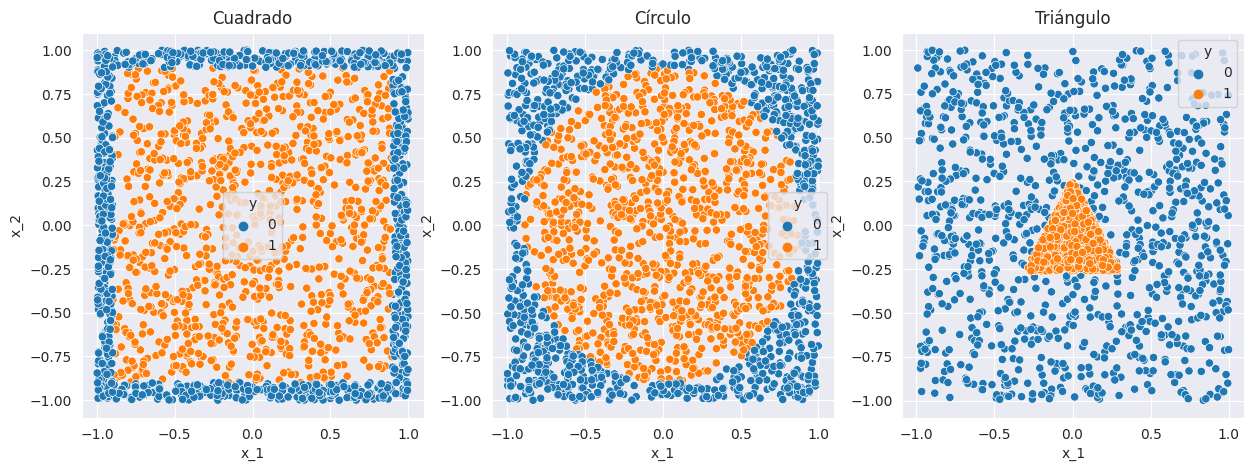

In [165]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Cuadrado')
sns.scatterplot(square_dataset, x='x_1', y='x_2', hue='y')

plt.subplot(1,3,2)
plt.title('Círculo')
sns.scatterplot(circle_dataset, x='x_1', y='x_2', hue='y')

plt.subplot(1,3,3)
plt.title('Triángulo')
sns.scatterplot(triangle_dataset, x='x_1', y='x_2', hue='y');

In [174]:
# Data split
square_x_train, square_x_test, square_y_train, square_y_test = train_test_split(
    square_dataset[['x_1', 'x_2']],
    square_dataset['y'],
    test_size=0.30)

circle_x_train, circle_x_test, circle_y_train, circle_y_test = train_test_split(
    circle_dataset[['x_1', 'x_2']],
    circle_dataset['y'],
    test_size=0.30)

triangle_x_train, triangle_x_test, triangle_y_train, triangle_y_test = train_test_split(
    triangle_dataset[['x_1', 'x_2']],
    triangle_dataset['y'],
    test_size=0.30)

In [175]:
# Modelos
square_model = RandomForestClassifier(criterion='entropy')
square_model.fit(square_x_train, square_y_train)

circle_model = RandomForestClassifier(criterion='entropy')
circle_model.fit(circle_x_train, circle_y_train)

triangle_model = RandomForestClassifier(criterion='entropy')
triangle_model.fit(triangle_x_train, triangle_y_train)

RandomForestClassifier(criterion='entropy')

In [194]:
# Evaluate
print(f"Exactitud del modelo cuadrado: {square_model.score(square_x_test, square_y_test)}")

Exactitud del modelo cuadrado: 0.9983333333333333


In [195]:
print(f"Exactitud del modelo circular: {circle_model.score(circle_x_test, circle_y_test)}")

Exactitud del modelo circular: 0.9783333333333334


In [196]:
print(f"Exactitud del modelo triangular: {triangle_model.score(triangle_x_test, triangle_y_test)}")

Exactitud del modelo triangular: 0.99


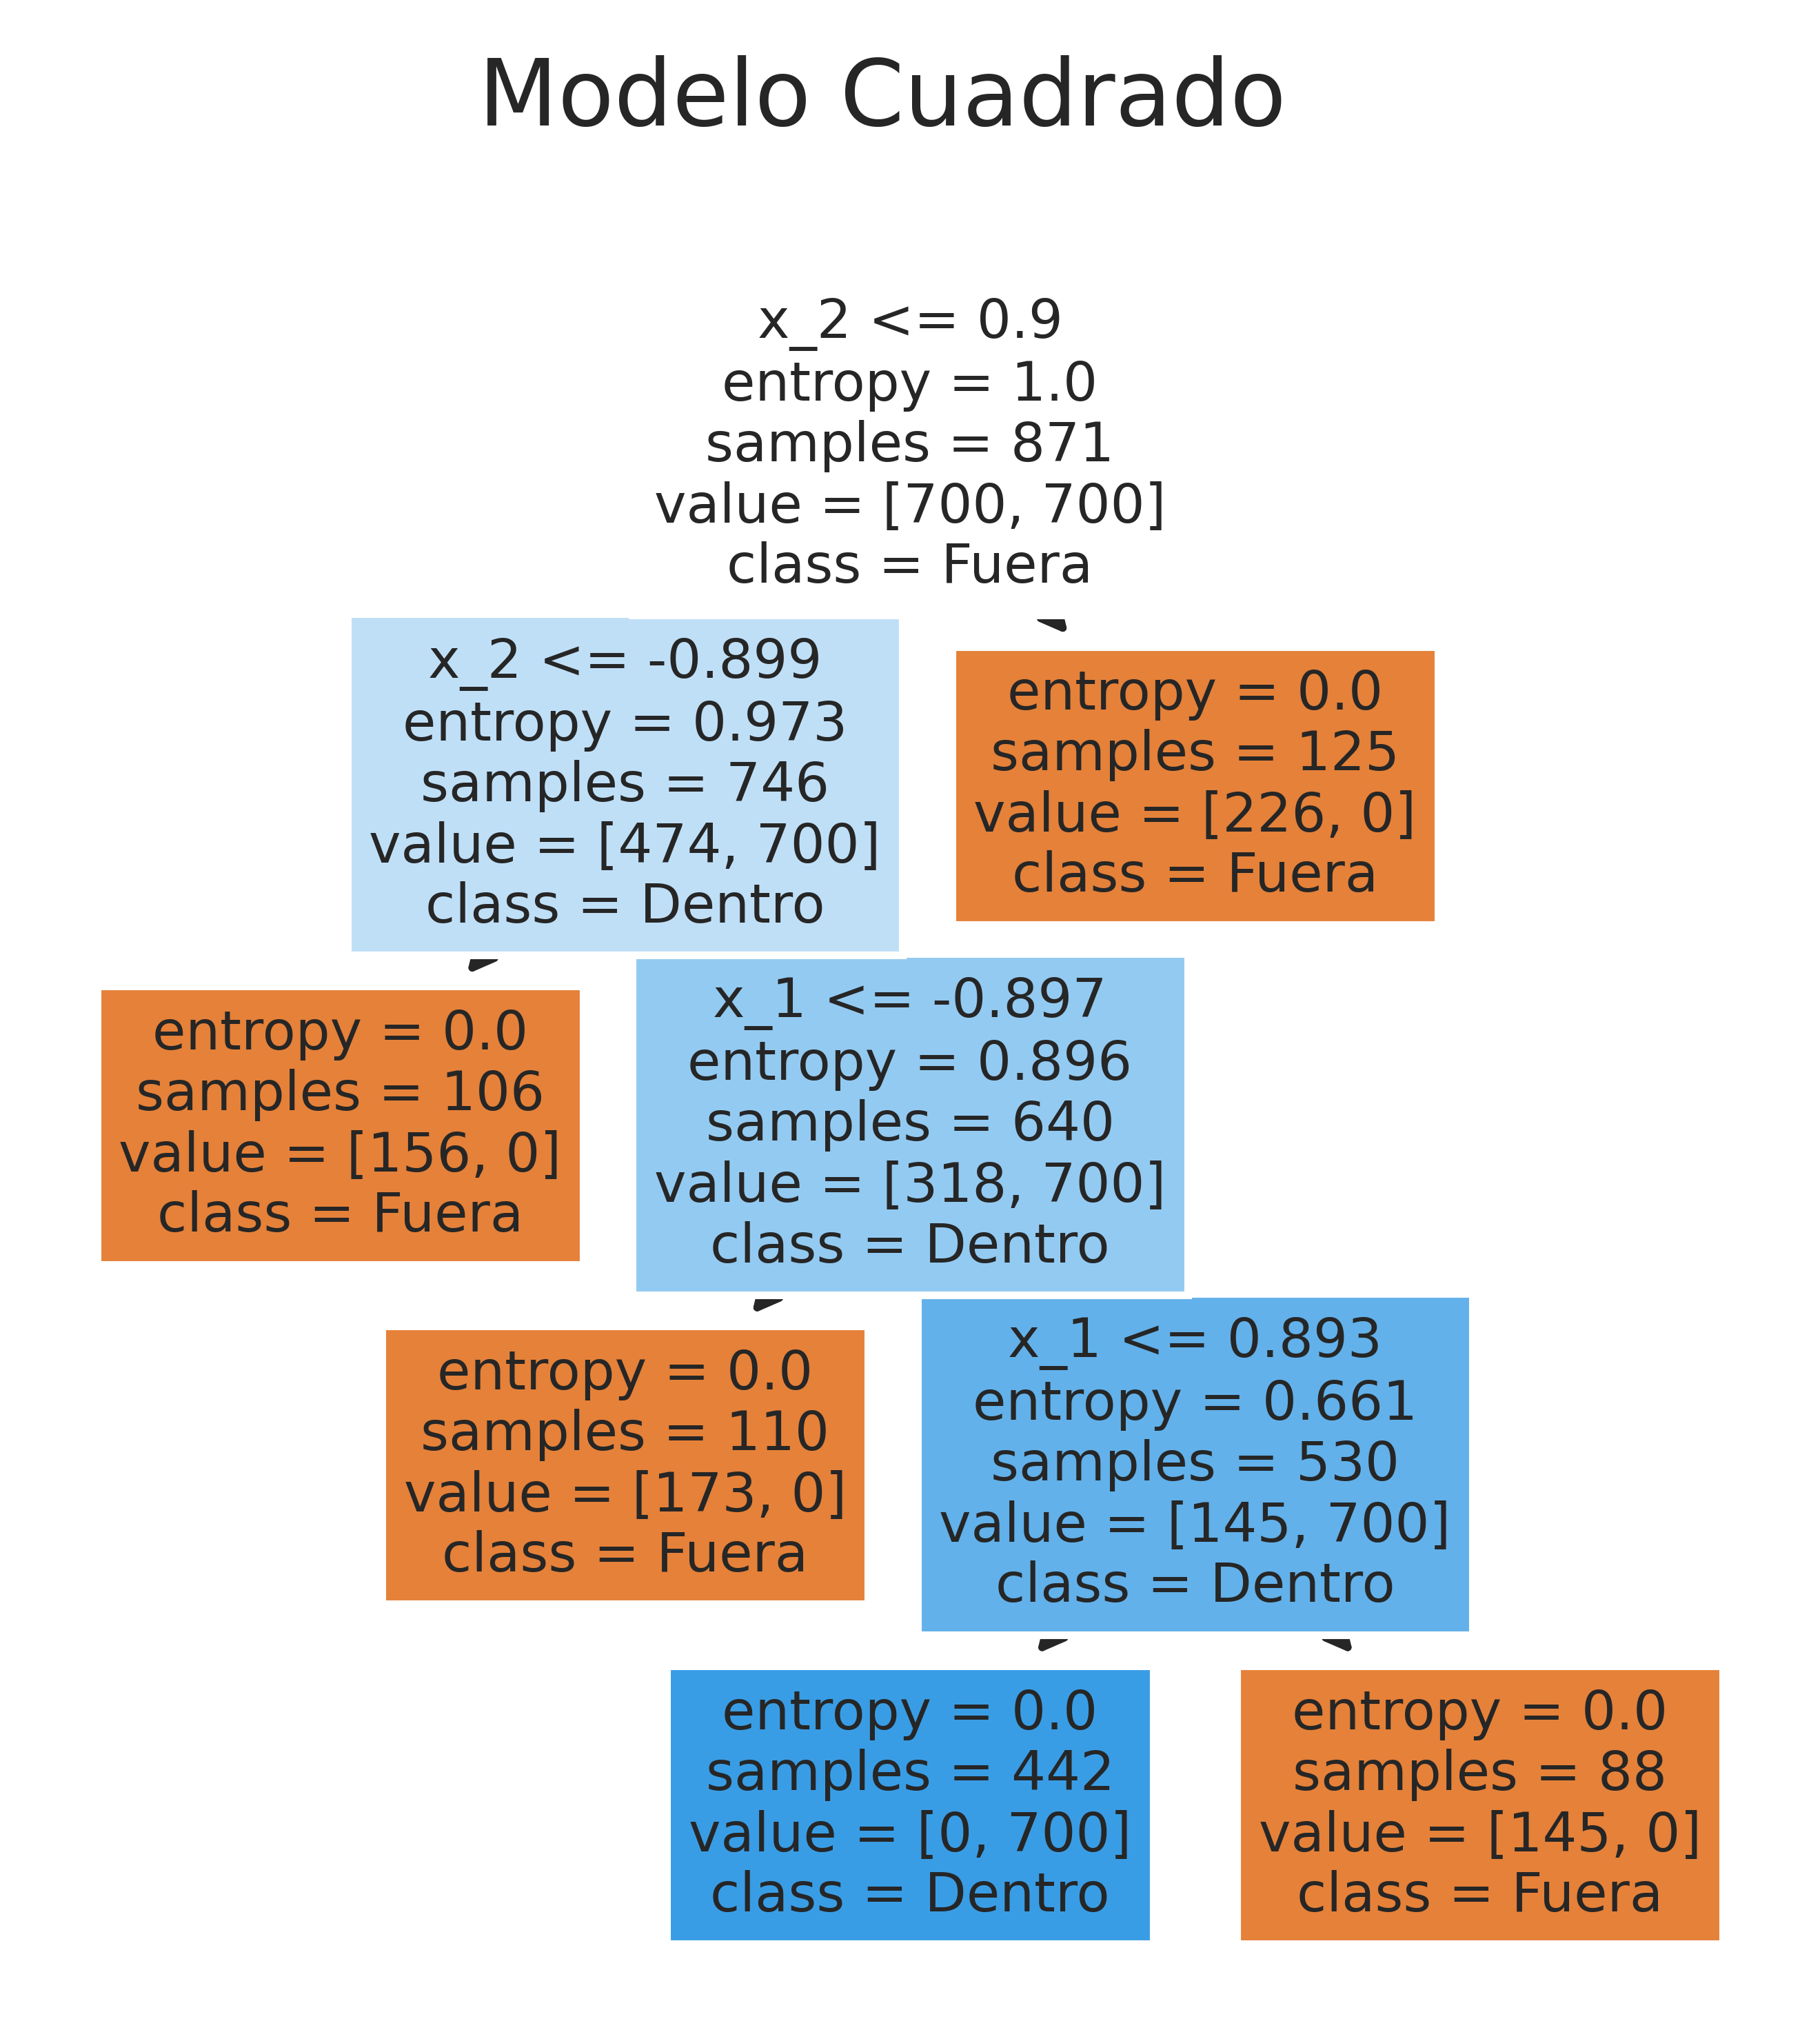

In [191]:
# Visualizamos árboles de decisión
fn = ['x_1', 'x_2']
cn = {0: 'Fuera', 1: 'Dentro'}

fig, _ = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi=800)
fig.suptitle('Modelo Cuadrado')
tree.plot_tree(
    square_model.estimators_[0],
    feature_names=fn,
    class_names=cn,
    filled=True)

fig.savefig('square_model_tree_example.png')

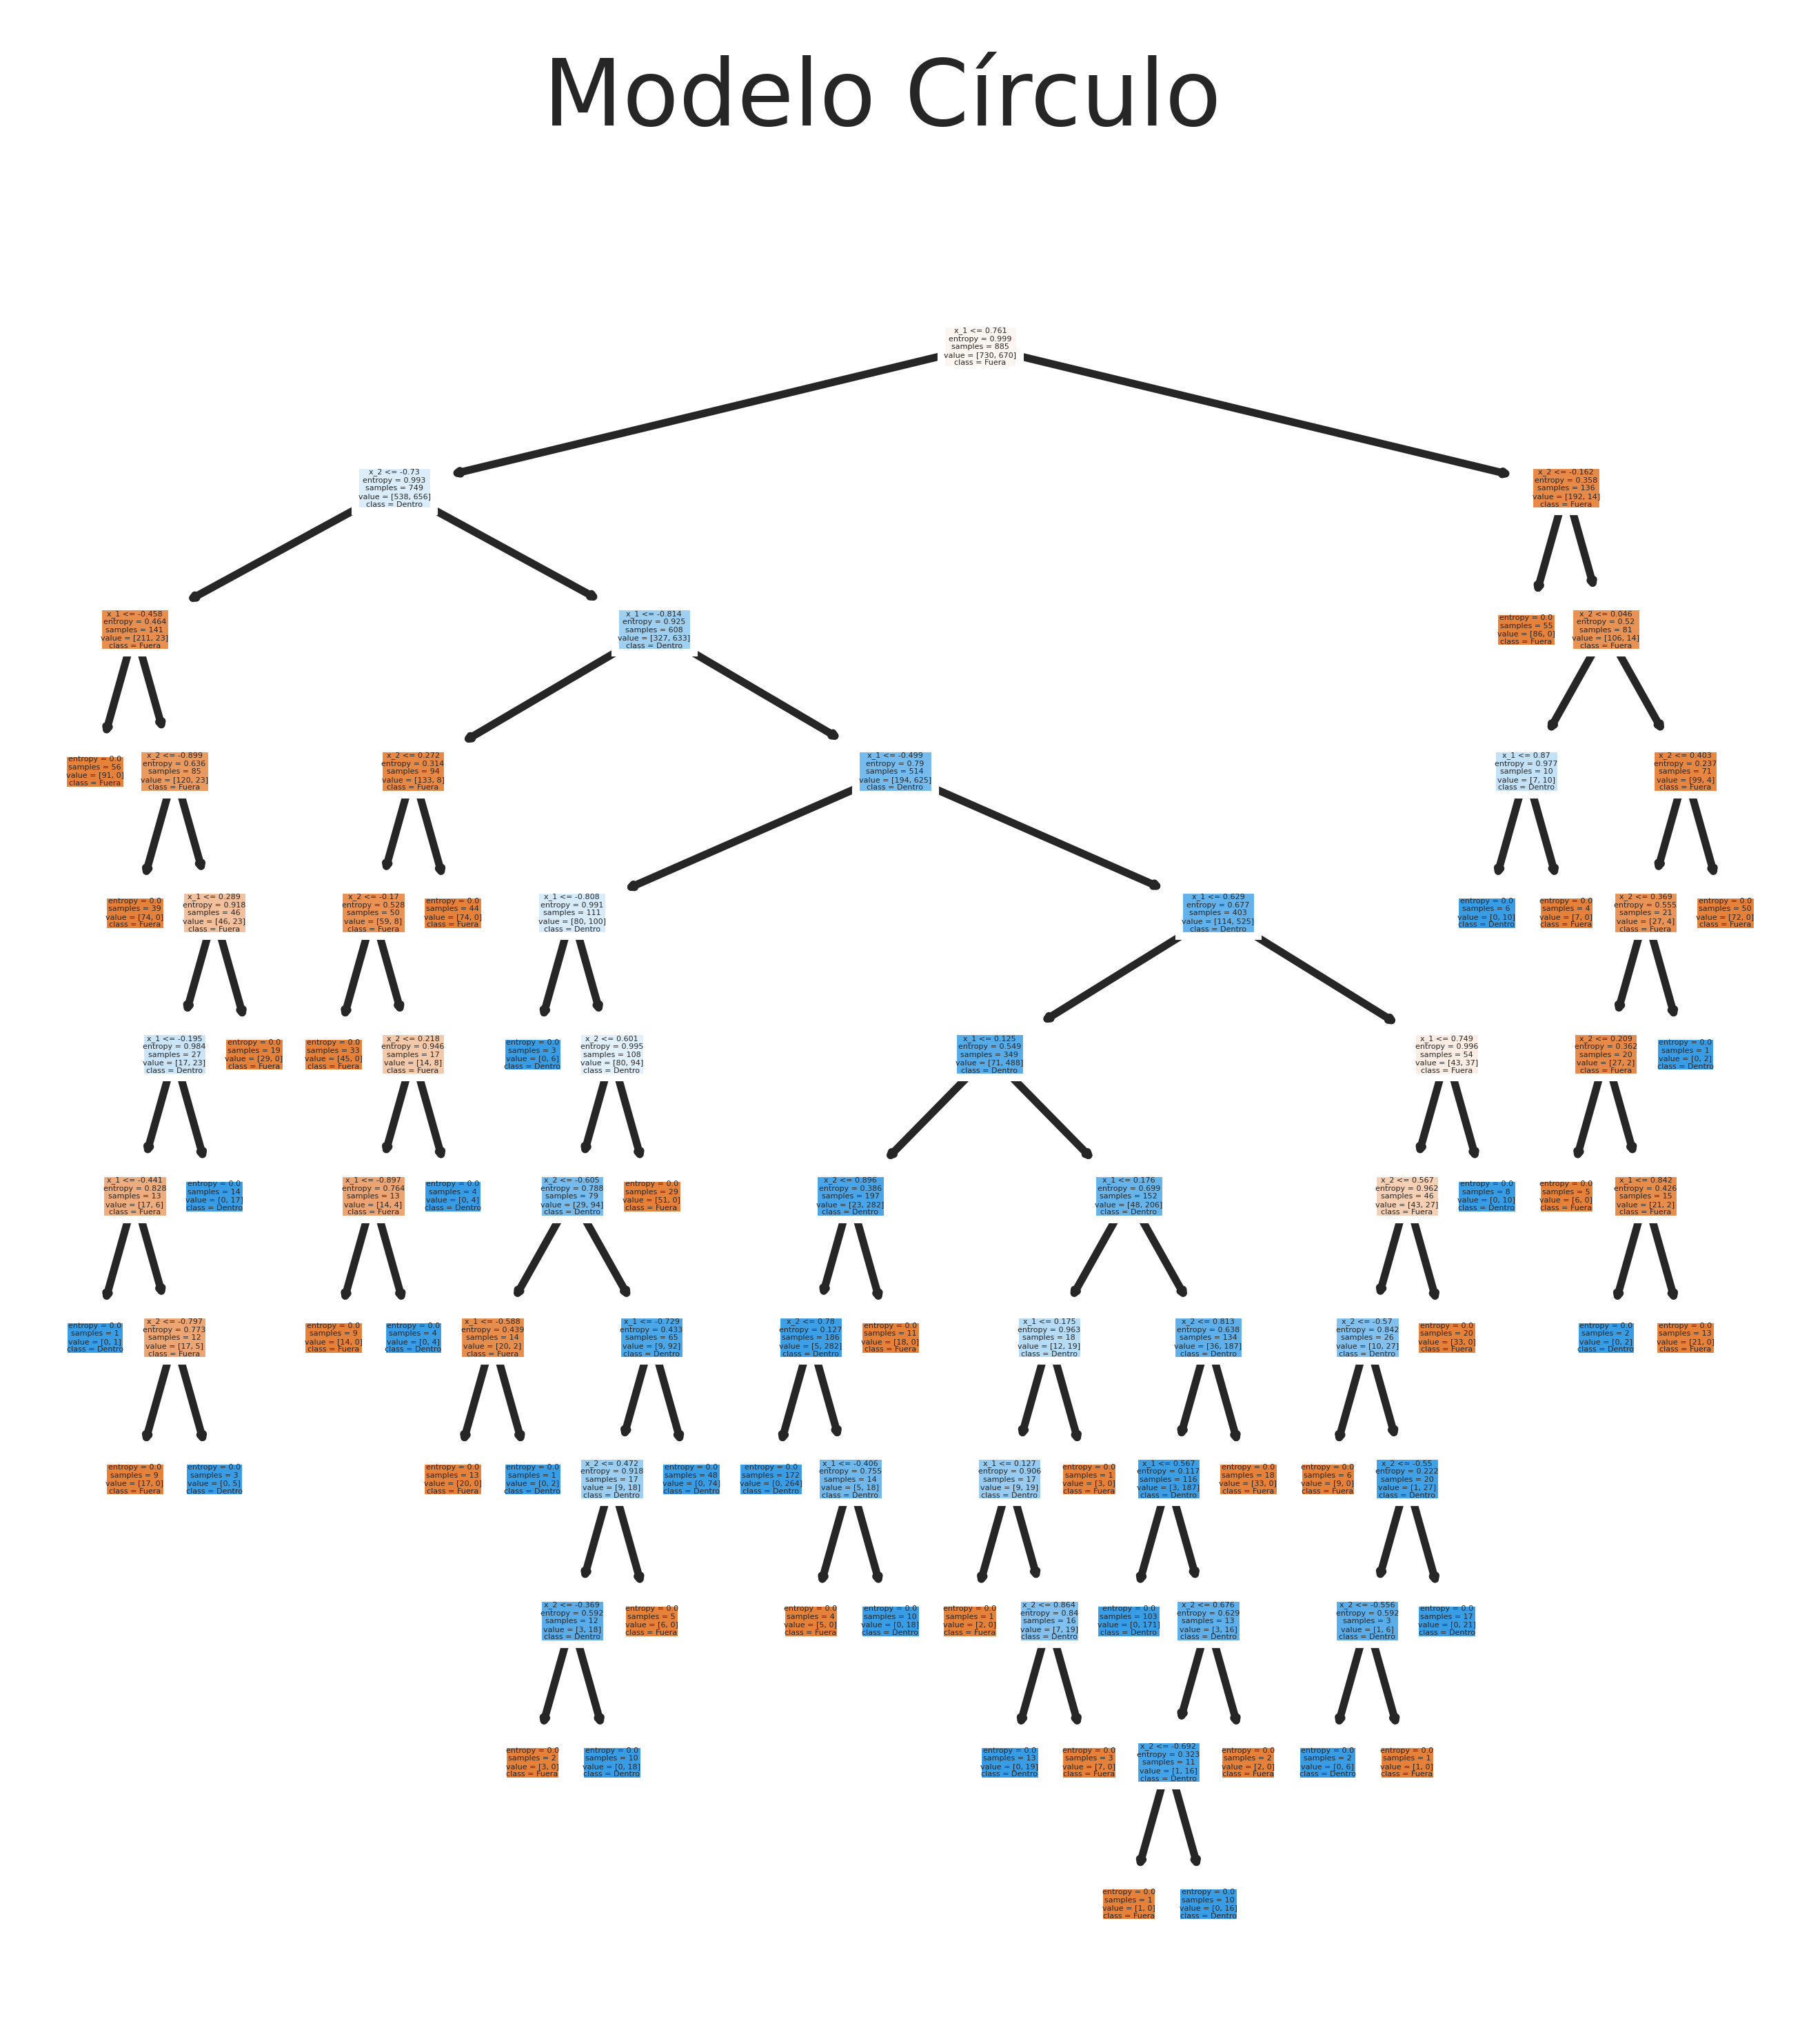

In [190]:
fig, _ = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi=800)
fig.suptitle('Modelo Círculo')
tree.plot_tree(
    circle_model.estimators_[0],
    feature_names=fn,
    class_names=cn,
    filled=True)

fig.savefig('circle_model_tree_example.png')

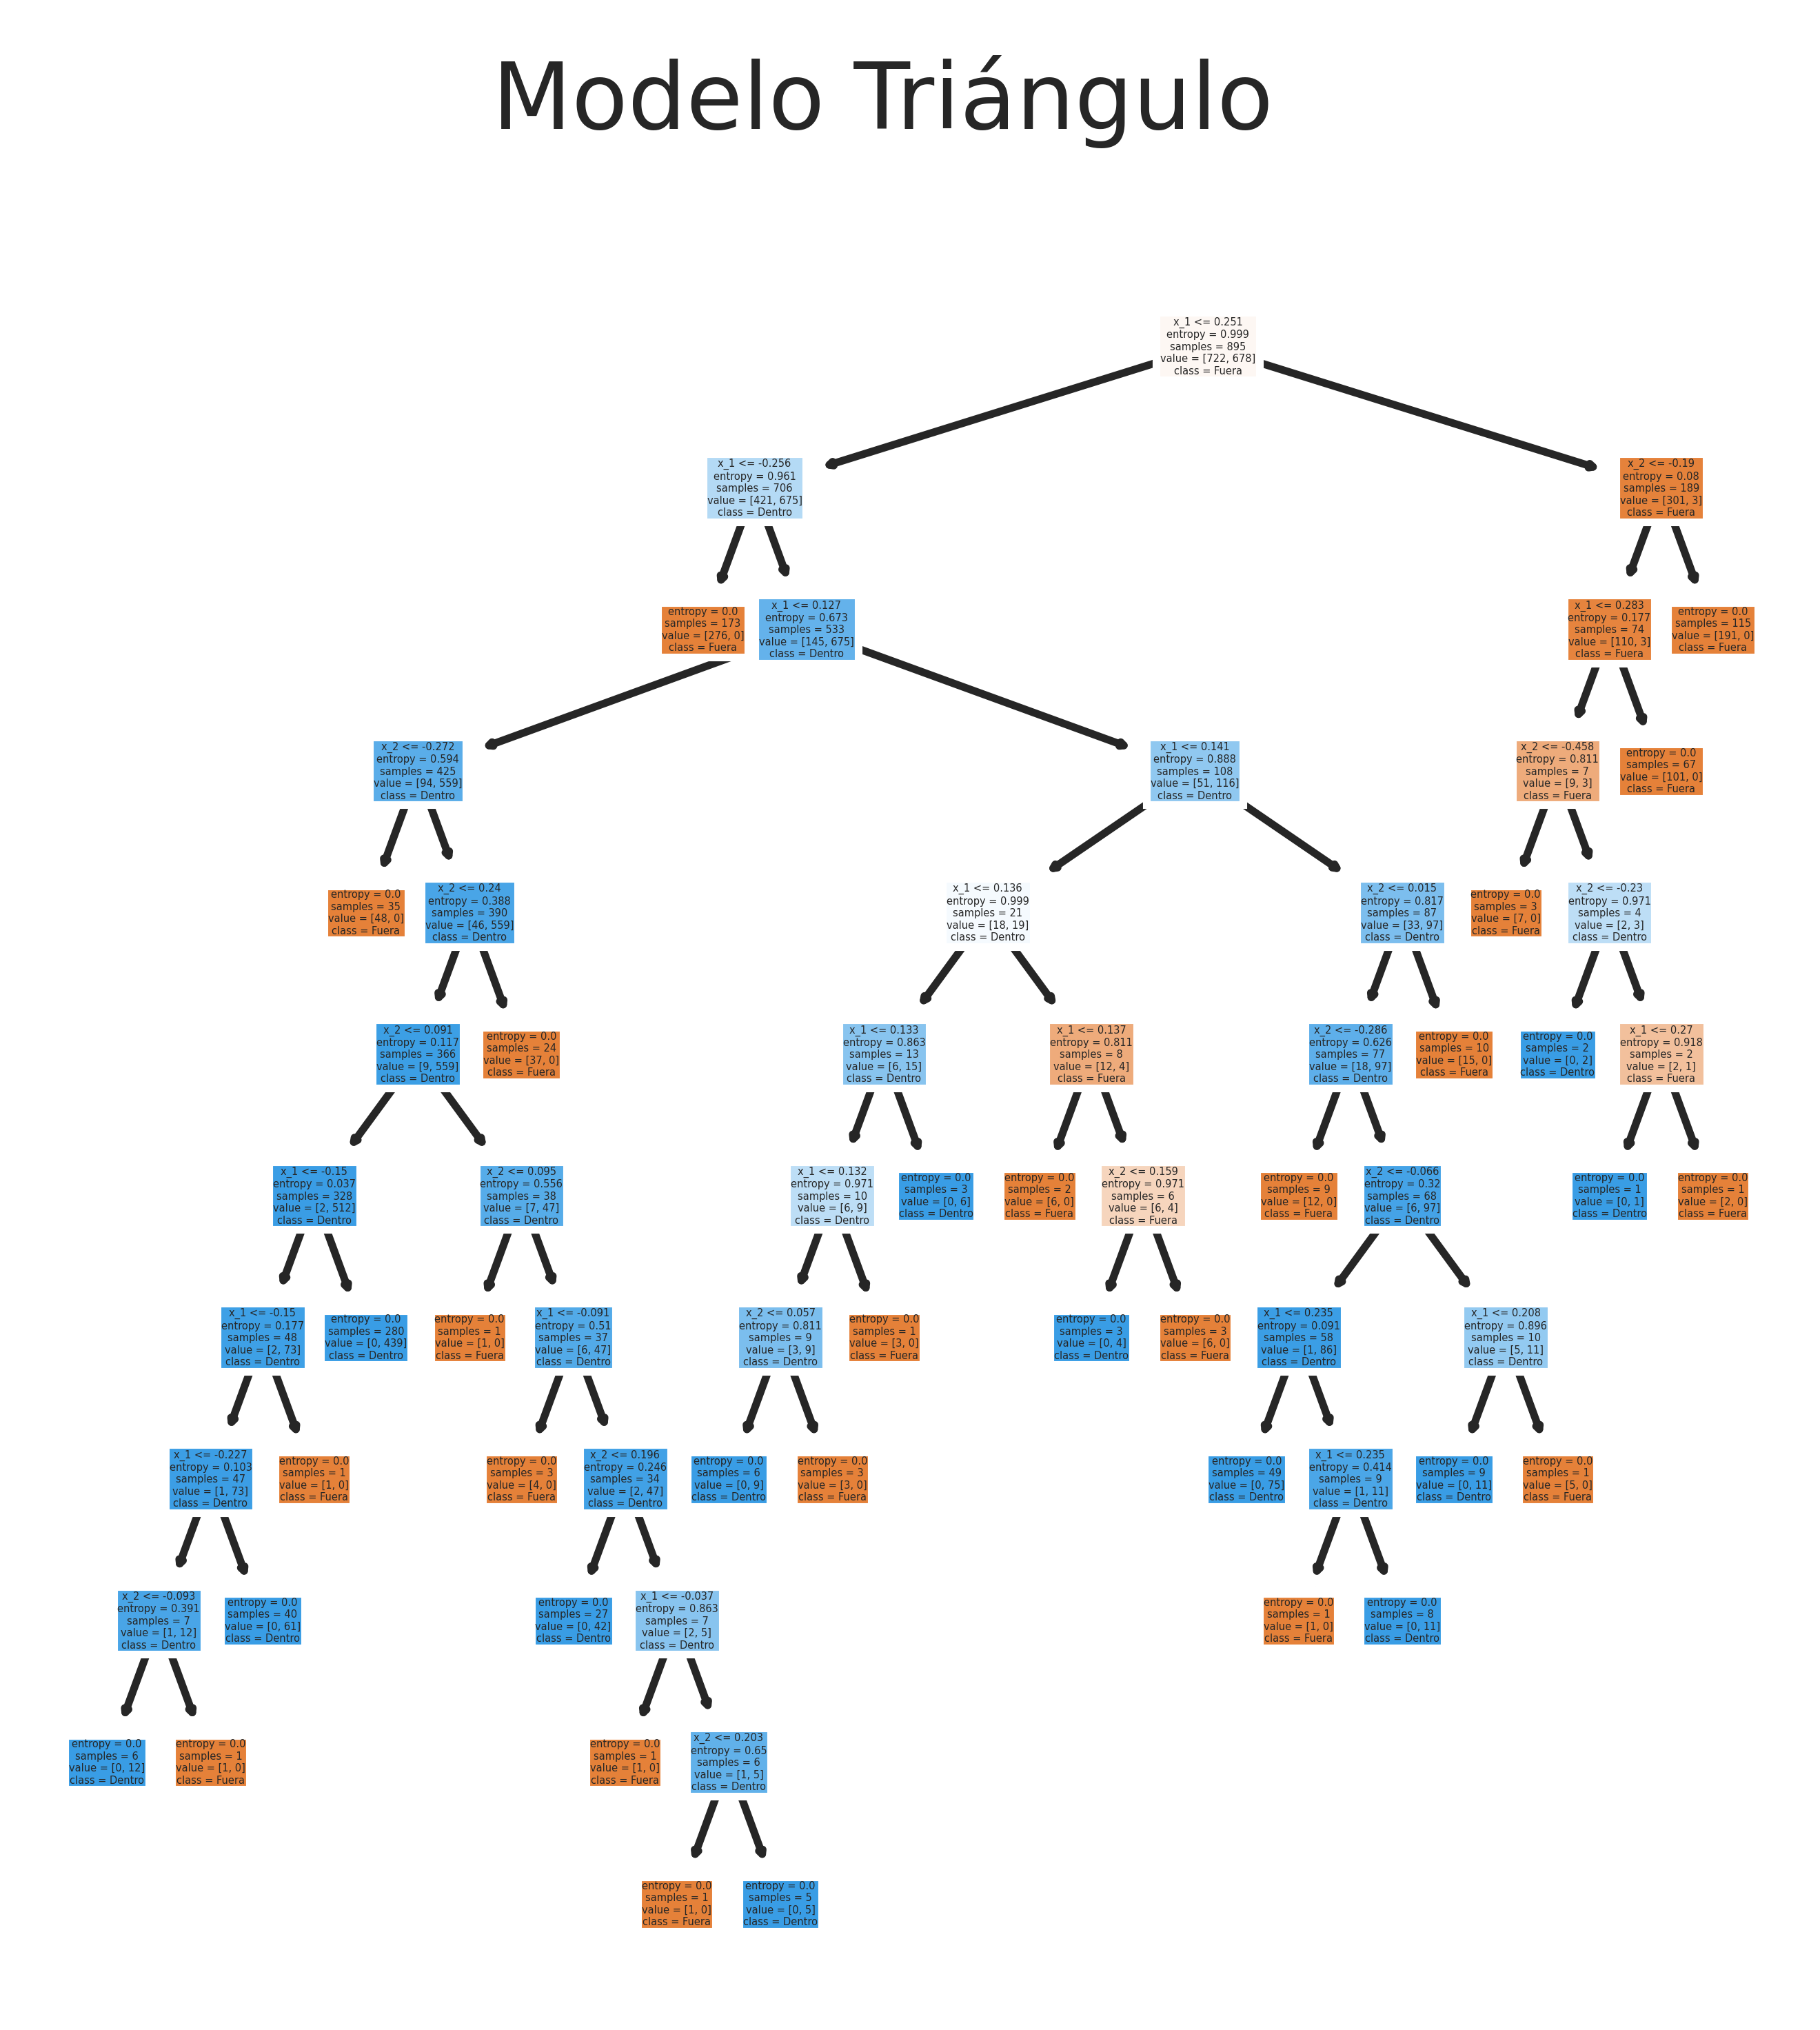

In [192]:
fig, _ = plt.subplots(nrows=1, ncols=1, figsize = (4,4), dpi=800)
fig.suptitle('Modelo Triángulo')
tree.plot_tree(
    triangle_model.estimators_[0],
    feature_names=fn,
    class_names=cn,
    filled=True)

fig.savefig('triangle_model_tree_example.png')